In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

# Data Visualiation
import matplotlib.pyplot as plt
import seaborn as sns

# System
import os

# Deep Learning
import tensorflow
from typing import Dict, List, Tuple, Sequence

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU

2023-08-05 15:32:54.962743: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-05 15:32:54.982649: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-05 15:32:55.305074: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-05 15:32:55.309265: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 15:32:57.327871: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
file_path="~/code/Agermita/intelligent_network_expansion/raw_data/data.csv"
processed_data = pd.read_csv(file_path, sep=',')

In [3]:
processed_data.shape

(2014423, 31)

In [4]:
processed_data.head(3)

,Unnamed: 0,Date,eNodeB identity,Cell ID,Trafic LTE.float,L.Traffic.ActiveUser.Avg.float,L.Traffic.User.Avg.float,DL throughput_GRP.float,DL PRB Usage.float,City_City_1,City_City_3,City_City_4,City_City_5,LTECell Tx and Rx Mode_1T1R,LTECell Tx and Rx Mode_2T2R,LTECell Tx and Rx Mode_2T4R,LTECell Tx and Rx Mode_4T4R,LTECell Tx and Rx Mode_8T8R,Downlink bandwidth_CELL_BW_N100,Downlink bandwidth_CELL_BW_N50,Downlink EARFCN_Band_1,Downlink EARFCN_Band_2,Downlink EARFCN_Band_3,Downlink EARFCN_Band_4,Downlink EARFCN_Band_5,eNodeB_identifier_int,Cell FDD TDD Indication_CELL_FDD,Cell FDD TDD Indication_CELL_TDD,City Type_Rural,City Type_Urbain,City Type_Urbain dense
0,0,2022-08-17,146007,1,62.2448,2.0625,42.7677,24.5815,14.6073,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,37377793,1.0,0.0,0.0,1.0,0.0
1,1,2022-08-17,146007,2,79.4215,2.6462,41.2266,13.6180,28.7316,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,37377794,1.0,0.0,0.0,1.0,0.0
2,2,2022-08-17,146007,3,75.3552,2.0158,32.4667,28.3735,16.2728,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,37377795,1.0,0.0,0.0,1.0,0.0


In [5]:
processed_data['Date'] = pd.to_datetime(processed_data['Date'], format='%Y-%m-%d')
#processed_data.dtypes

In [6]:
processed_data.drop('Unnamed: 0', axis=1, inplace=True)
#processed_data.drop('Unnamed: 0.1', axis=1, inplace=True)

In [7]:
def replace_missing_dates(df, start_date, end_date) -> pd.DataFrame :
    missing_date=pd.date_range(start = start_date, end = end_date ).difference(df["Date"])
    date={}
    df_new=df.copy()
    if(len(missing_date)>0):
        for i in range(0,len(missing_date)):
            data={'Date': missing_date[i], 
                    'eNodeB identity': df['eNodeB identity'][0], 
                    'Cell ID' : df['Cell ID'][0],
                    'Trafic LTE.float' :float(0),
                    'L.Traffic.ActiveUser.Avg.float':float(0), 
                    'L.Traffic.User.Avg.float' :float(0),
                    'DL throughput_GRP.float':float(0), 
                    'DL PRB Usage.float':float(0), 
                    'City_City_1': df['City_City_1'][0],
                    'City_City_3': df['City_City_3'][0], 
                    'City_City_4': df['City_City_4'][0], 
                    'City_City_5': df['City_City_5'][0],
                    'LTECell Tx and Rx Mode_1T1R': df['LTECell Tx and Rx Mode_1T1R'][0],
                    'LTECell Tx and Rx Mode_2T2R': df['LTECell Tx and Rx Mode_2T2R'][0],
                    'LTECell Tx and Rx Mode_2T4R': df['LTECell Tx and Rx Mode_2T4R'][0],
                    'LTECell Tx and Rx Mode_4T4R': df['LTECell Tx and Rx Mode_4T4R'][0],
                    'LTECell Tx and Rx Mode_8T8R': df['LTECell Tx and Rx Mode_8T8R'][0], 
                    'Downlink bandwidth_CELL_BW_N100': df['Downlink bandwidth_CELL_BW_N100'][0],
                    'Downlink bandwidth_CELL_BW_N50': df['Downlink bandwidth_CELL_BW_N50'][0], 
                    'Downlink EARFCN_Band_1': df['Downlink EARFCN_Band_1'][0],
                    'Downlink EARFCN_Band_2': df['Downlink EARFCN_Band_2'][0],
                    'Downlink EARFCN_Band_3': df['Downlink EARFCN_Band_3'][0],
                    'Downlink EARFCN_Band_4': df['Downlink EARFCN_Band_4'][0],
                    'Downlink EARFCN_Band_5': df['Downlink EARFCN_Band_5'][0],
                    'eNodeB_identifier_int': df['eNodeB_identifier_int'][0],
                    'Cell FDD TDD Indication_CELL_FDD': df['Cell FDD TDD Indication_CELL_FDD'][0],
                    'Cell FDD TDD Indication_CELL_TDD': df['Cell FDD TDD Indication_CELL_TDD'][0],
                    'City Type_Rural': df['City Type_Rural'][0],
                    'City Type_Urbain': df['City Type_Urbain'][0],
                    'City Type_Urbain dense': df['City Type_Urbain dense'][0]          
                    }
            #print (data)
            new_row=pd.DataFrame([data])
            df_new=pd.concat([df_new,new_row])
            df_new.sort_values('Date')
    return df_new


In [8]:

def replace_missing_dates_all(df) -> pd.DataFrame :
    cells=df[["eNodeB identity",'Cell ID']]
    cells=cells.drop_duplicates()
    start_date=df['Date'].min()
    end_date=df['Date'].max()

    for index, row in cells.iterrows():
        df_cell=df[(df["eNodeB identity"]==row[0]) & (df["Cell ID"]==row[1])]
        df_cell=df_cell.reset_index(drop=True)

        df_cell=replace_missing_dates(df_cell, start_date, end_date)
        if index==0:
            df_new=df_cell
        elif index<2000:
            df_new=pd.concat([df_new,df_cell])
        else:
            break

    return df_new


In [9]:
df_processed_completed = replace_missing_dates_all(processed_data)
df_processed_completed.shape

(401580, 30)

format the dataframe global to X with 3 dimensions X.shape=(number of cell, number of days, number of features)

In [10]:
def create_X_y(df) ->np.array :
    cells=df[["eNodeB identity",'Cell ID','eNodeB_identifier_int']].sort_values(by='eNodeB_identifier_int')
    cells=cells.drop_duplicates()
    #start_date=df['Date'].min()
    #end_date=df['Date'].max()
    #print (cells.shape)
    data=[]
    data_y=[]
    for index, row in cells.iterrows():
        df_cell=df[(df["eNodeB identity"]==row[0]) & (df["Cell ID"]==row[1])].sort_values(by='Date')
        #df_cell=df_cell.reset_index(drop=True)
        
        #df_cell=replace_missing_dates(df_cell, start_date, end_date)
        """ for modeling, the X and y should not contain sequences identty (eNodeB id and cell id)"""
        df_cell.drop('eNodeB identity', axis=1, inplace=True)
        df_cell.drop('Cell ID', axis=1, inplace=True)
        df_cell.drop('Date', axis=1, inplace=True)
        df_cell.drop('eNodeB_identifier_int', axis=1, inplace=True)
        """---------------------"""
        df_cell_y=df_cell['Trafic LTE.float']
        
        data.append(df_cell)
        data_y.append(df_cell_y)

    #print (len(data))


    X=np.array(data)
    y=np.array(data_y)
    y=np.expand_dims(np.array(y), axis=2)
    return cells, X , y

In [11]:
cells,X,y=create_X_y(df_processed_completed)

In [12]:
X.shape, y.shape

((1164, 345, 26), (1164, 345, 1))

In [28]:
X.shape, X[:,:100,:].shape, X[:500,:,:].shape

((1164, 345, 26), (1164, 100, 26), (500, 345, 26))

In [33]:
def split_train_test(X,y, ratio=0.8) ->tuple:
    X_train, X_test = X[:,:int(ratio*X.shape[1]),:], X[:,int(ratio*X.shape[1]):,:]
    y_train, y_test = y[:,:int(ratio*y.shape[1]),:], y[:,int(ratio*y.shape[1]):,:]
    
    return X_train, X_test, y_train, y_test

In [34]:
X_train, X_test, y_train, y_test=split_train_test(X,y, ratio=0.8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1164, 276, 26), (1164, 69, 26), (1164, 276, 1), (1164, 69, 1))

In [44]:
X_train, X_val, y_train, y_val=split_train_test(X_train,y_train, ratio=0.8)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1164, 220, 26), (1164, 56, 26), (1164, 220, 1), (1164, 56, 1))

In [49]:
def initialize_model(input_shape: tuple, output_length) -> models:
    #output_length = y_train.shape[1]
    #input_shape =(X.shape[1],X.shape[2])
    """
    Initialize the Neural Network with random weights
    """

    model = models.Sequential()
    
    ## 1.1 - Recurrent Layer
    model.add(layers.Masking(mask_value=0.0, input_shape=input_shape))
    #model.add(layers.SimpleRNN(units=2, activation='tanh', input_shape=input_shape))
    model.add(GRU(units=16, activation='tanh', input_shape=input_shape))
        
    '''
    model.add(layers.LSTM(units=64,
                        activation='relu',
                        return_sequences = True,
                        kernel_regularizer=L1L2(l1=0.05, l2=0.05),
                         ))
    '''
                     
    ## 1.2 - Hidden Dense Layers
    
    model.add(layers.Dense(32, activation="relu", kernel_regularizer = L1L2(l1=0.05, l2=0.05)))
    #model.add(layers.Dense(64, activation="relu"))
    #model.add(layers.Dense(128, activation="relu"))
    #model.add(layers.Dense(64, activation="relu"))
    #model.add(layers.Dense(32, activation="relu"))
    model.add(layers.Dense(16, activation="relu"))
    model.add(layers.Dropout(rate=0.5))
    
    ## 1.2 - Predictive Dense Layers

    model.add(layers.Dense(output_length, activation='linear'))

    return model


def compile_model(model: models) -> models:
    """
    Compile the Neural Network
    """

    # 2 - Compiler
    # ======================
    initial_learning_rate = 0.01

    #lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=1000, decay_rate=0.5)

    #adam = optimizers.Adam(learning_rate=initial_learning_rate)
    #model.compile(loss='mse', optimizer=adam, metrics=["mae"])
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=["mae", "mape"] )

    return model

def train_model(
        model: models,
        X: np.ndarray,
        y: np.ndarray,
        patience=20,
        validation_data=None, # overrides validation_split
        ) -> Tuple[tensorflow.keras.Model, dict]:
    """
    Fit the model and return a tuple (fitted_model, history)
    """
    
    es = EarlyStopping(monitor = "val_loss",
                      patience = patience,
                      mode = "min",
                      restore_best_weights = True)
    

    history = model.fit(X, y,
                        validation_data = validation_data,                        
                        batch_size = 32,
                        epochs = 100,
                        callbacks = [es],
                        verbose = 1)

    return model, history

In [46]:
input_shape =(X_train.shape[1],X_train.shape[2])
output_length = y_train.shape[1]

In [47]:
rnn=initialize_model(input_shape, output_length)

In [48]:
rnn=compile_model(rnn)

In [50]:
rnn, history=train_model(
        rnn,
        X_train,
        y_train,
        10,
        (X_val, y_val) 
        )

Epoch 1/100
37/37 [==============================] - ETA: 0s - loss: 12890.5146 - mae: 86.1529 - mape: 2532142.7500

ValueError: in user code:

    File "/home/farah/.pyenv/versions/3.10.6/envs/intelligent_network_expansion/lib/python3.10/site-packages/keras/src/engine/training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "/home/farah/.pyenv/versions/3.10.6/envs/intelligent_network_expansion/lib/python3.10/site-packages/keras/src/engine/training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/farah/.pyenv/versions/3.10.6/envs/intelligent_network_expansion/lib/python3.10/site-packages/keras/src/engine/training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "/home/farah/.pyenv/versions/3.10.6/envs/intelligent_network_expansion/lib/python3.10/site-packages/keras/src/engine/training.py", line 1850, in test_step
        y_pred = self(x, training=False)
    File "/home/farah/.pyenv/versions/3.10.6/envs/intelligent_network_expansion/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/farah/.pyenv/versions/3.10.6/envs/intelligent_network_expansion/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 220, 26), found shape=(None, 56, 26)


In [20]:
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 345, 26)           0         
                                                                 
 gru (GRU)                   (None, 16)                2112      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 345)               5865      
                                                                 
Total params: 9049 (35.35 KB)
Trainable params: 9049 (35

In [21]:
def plot_history(history):

    fig, ax = plt.subplots(1,2, figsize=(20,7))
    # --- LOSS: MSE ---
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('MSE')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- METRICS:MAE ---

    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('MAE')
    ax[1].set_ylabel('MAE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    return ax

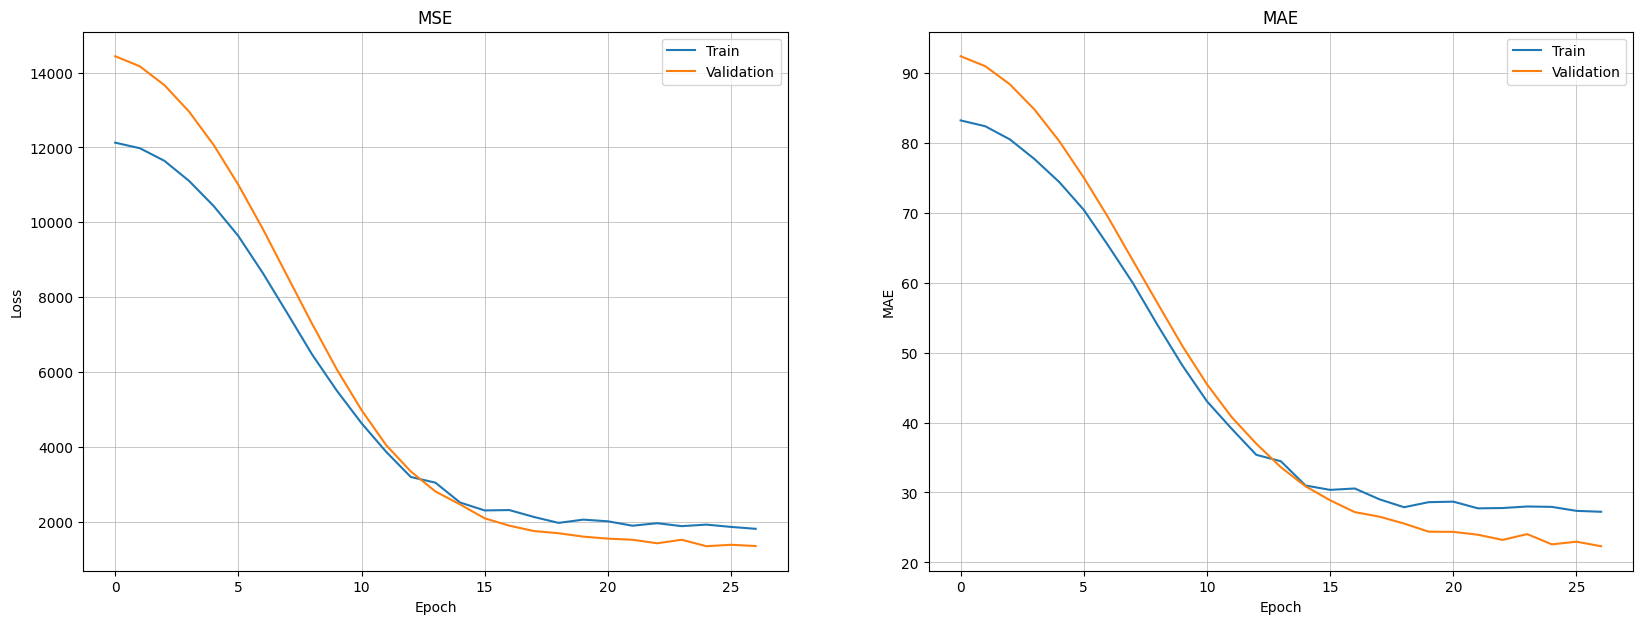

In [43]:
plot_history(history);

In [23]:
res = rnn.evaluate(X_test, y_test)

8/8 [==============================] - 0s 43ms/step - loss: 2383.7300 - mae: 32.5771 - mape: 955749696.0000


In [24]:
res

[2383.72998046875, 32.5771484375, 955749696.0]

In [25]:
y_pred=rnn.predict(X)

37/37 [==============================] - 3s 30ms/step
